In [619]:
using Distributions, StatsBase,PyPlot
using LinearAlgebra
PyPlot.svg(true)

true

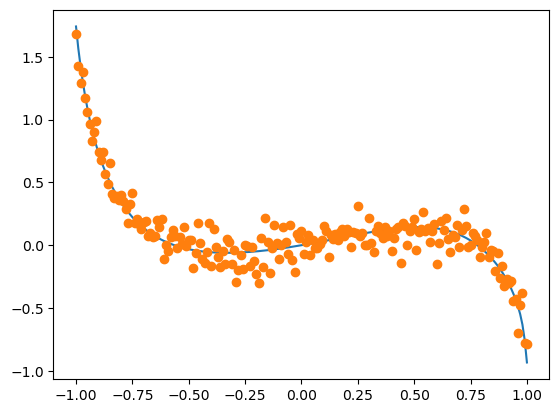

201

In [649]:
a = [rand(Normal(0,1/s^0.8)) for s in 1:200]
L = length(a)
phi(x,k) = x^k
f(x) = sum([phi(x,k)*a[k] for k in 1:L])

x = collect(-1:0.01:1);
M = length(x)
y = f.(x) + rand(Normal(0,0.1),M)


plt.plot(x,f.(x))

plt.plot(x,y,"o")
length(x)

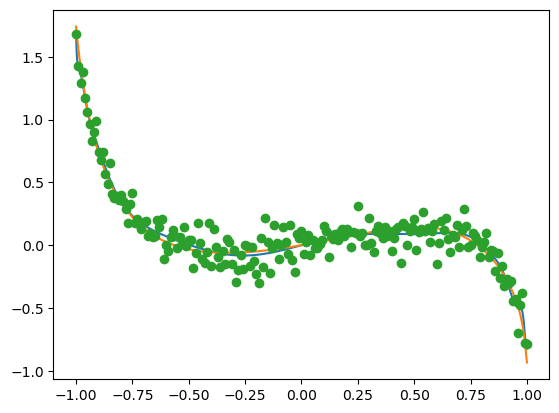

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1e26868b0>

In [650]:

xp = collect(-1:0.003:1)
Koo = hcat([[k.(xi,xj) for xi in x] for xj in x]...)
Kpo = hcat([[k.(xi,xj) for xi in xp] for xj in x]...)
K = Koo .+ 0.00001*Matrix(I, length(x),length(x))
plt.plot(xp,Kpo*inv(K)*y)
plt.plot(x,f.(x))
plt.plot(x,y,"o")

In [651]:
E = []
z_range = collect(4:1:100)
for z in z_range
    function s(k)
        if k>z
            return 0
        else 
            return 1
        end
        return 100/z^k*z
    end
    
    function k(x1,x2)
        sm = 0
        for k in collect(1:100)
            sm = sm + s(k)*(x1*x2)^k
        end
        return sm
   #     return exp(-abs(x1-x2)/z)
    end
    

    xp = collect(-1:0.3:1)
    Koo = hcat([[k.(xi,xj) for xi in x] for xj in x]...)
    Kpo = hcat([[k.(xi,xj) for xi in xp] for xj in x]...)
    K = Koo .+ 0.004*Matrix(I, length(x),length(x))
    push!(E,sum((f.(xp) .- Kpo*inv(K)*y).^2))
end

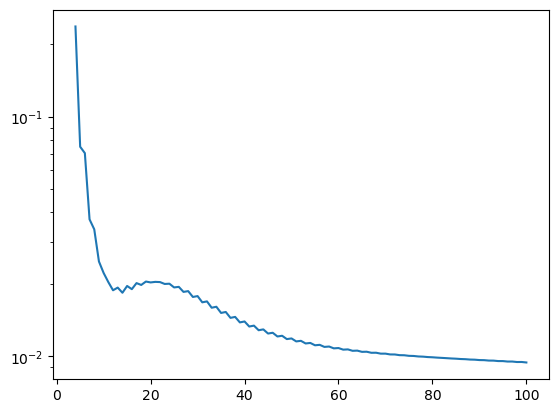

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1e85a0d30>

In [655]:
plt.semilogy(z_range,E,"-")

In [633]:
E = []
z_range = collect(10:1:100)
for z in z_range
    function s(k)
#         if k>z
#             return 0
#         else 
#             return 1
#         end
        return 4/z^k*z
    end
    
    function k(x1,x2)
        sm = 0
        for k in collect(1:100)
            sm = sm + s(k)*(x1*x2)^k
        end
        return sm
    end
    

    xp = collect(-1:0.3:1)
    Koo = hcat([[k.(xi,xj) for xi in x] for xj in x]...)
    Kpo = hcat([[k.(xi,xj) for xi in xp] for xj in x]...)
    K = Koo .+ 0.4*Matrix(I, length(x),length(x))
    push!(E,sum((f.(xp) .- Kpo*inv(K)*y).^2))
end

LoadError: InterruptException:

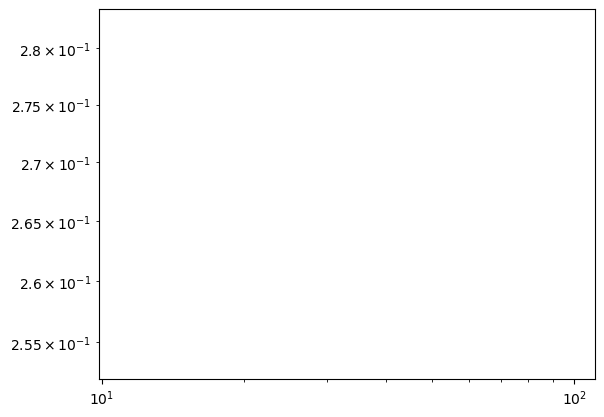

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1e31e8b80>

In [519]:
plt.loglog(z_range,E)